Import all the libraries you require in the cell below.

In [ ]:
# import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv("CommuteStLouis.csv")
df

,City,Age,Distance,Time,Sex
0,St. Louis,52,10,20,M
1,St. Louis,21,35,40,F
2,St. Louis,23,40,45,F
3,St. Louis,38,0,2,M
4,St. Louis,26,15,25,M
...,...,...,...,...,...
495,St. Louis,49,10,15,F
496,St. Louis,57,2,5,F
497,St. Louis,35,0,5,F
498,St. Louis,32,10,30,M


### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

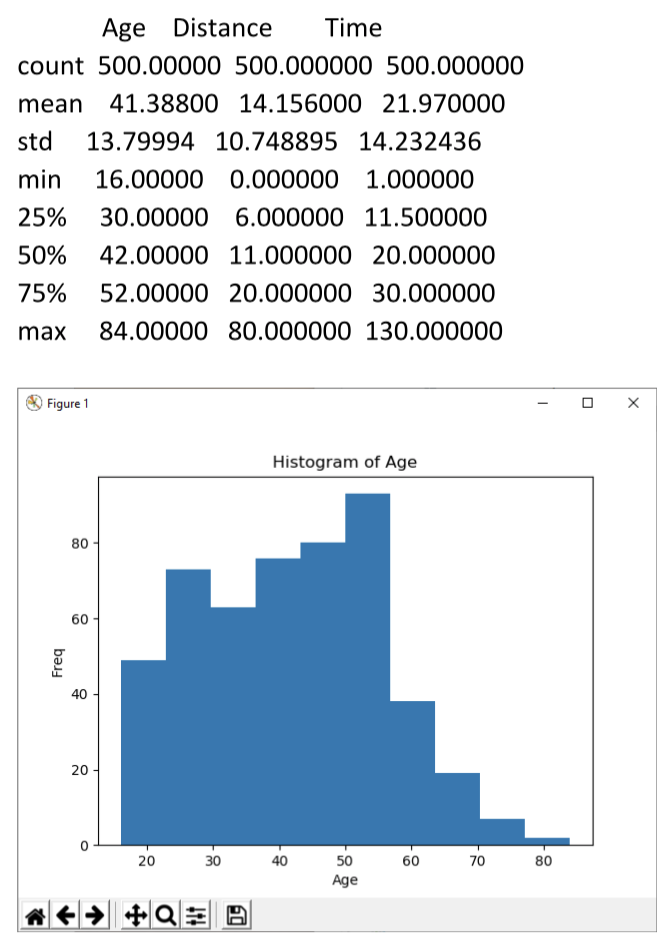

In [ ]:
# Type solution here
df.describe()


,Age,Distance,Time
count,500.00000,500.000000,500.000000
mean,41.38800,14.156000,21.970000
std,13.79994,10.748895,14.232436
min,16.00000,0.000000,1.000000
25%,30.00000,6.000000,11.500000
50%,42.00000,11.000000,20.000000
75%,52.00000,20.000000,30.000000
max,84.00000,80.000000,130.000000


Text(0.5, 1.0, 'Histogram of Age')

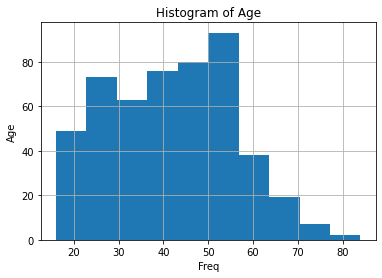

In [ ]:
df.hist(column = "Age")
plt.xlabel("Freq")
plt.ylabel("Age")
plt.title("Histogram of Age")

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

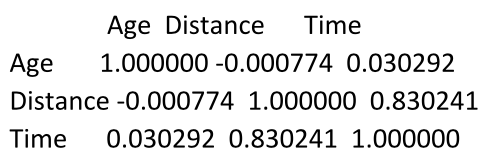

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

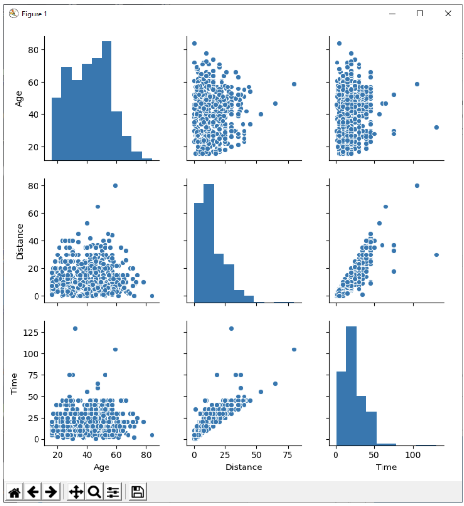

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

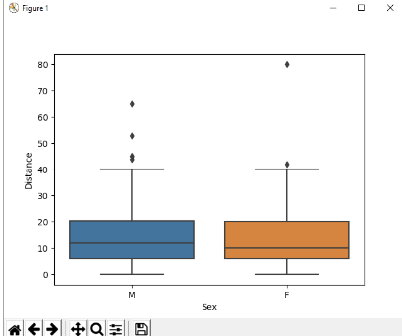

In [ ]:
# Type solution here
df.corr()

,Age,Distance,Time
Age,1.000000,-0.000774,0.030292
Distance,-0.000774,1.000000,0.830241
Time,0.030292,0.830241,1.000000


The two most closely correlated variables are distance and time. The coefficient is (0.83)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7683d89990>,
      dtype=object)

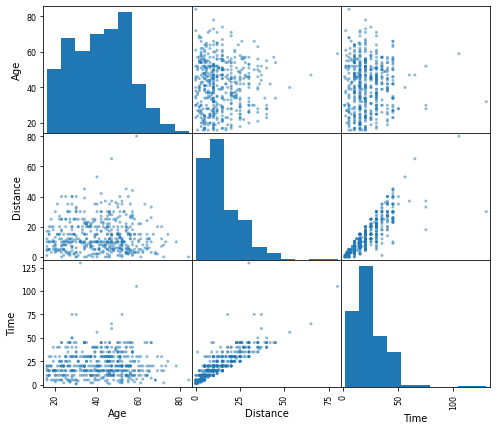

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(8,7))



Age is skewed to the left meaning that more younger people are traveling. Distance is also skewed to the left because shorter distances are more common. Time increases as distance increases and is genereally unrelated to travel time.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


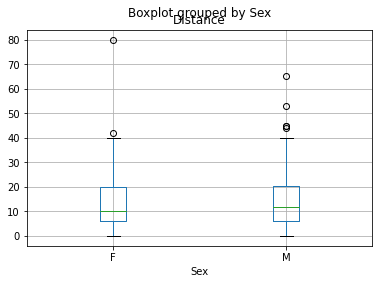

In [ ]:
df.boxplot(column = "Distance", by = "Sex")

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

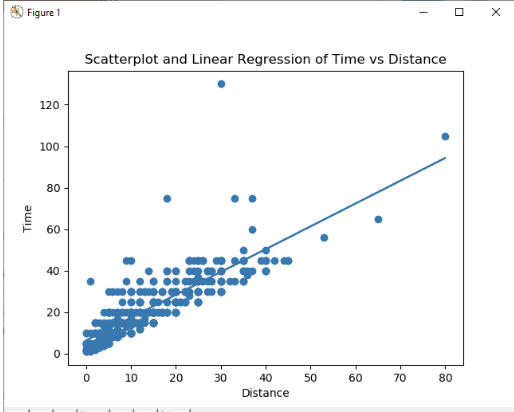

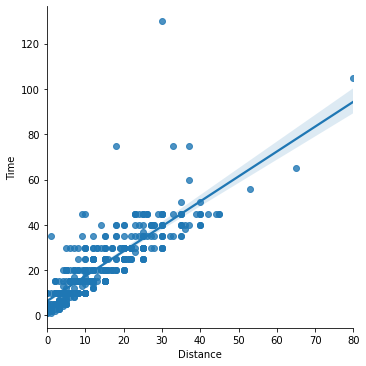

In [ ]:
# Type solution here
sns.lmplot(x = "Distance", y = "Time", data = df, fit_reg = True)


### 4. Show the distribution of residuals of the data from Part 3.

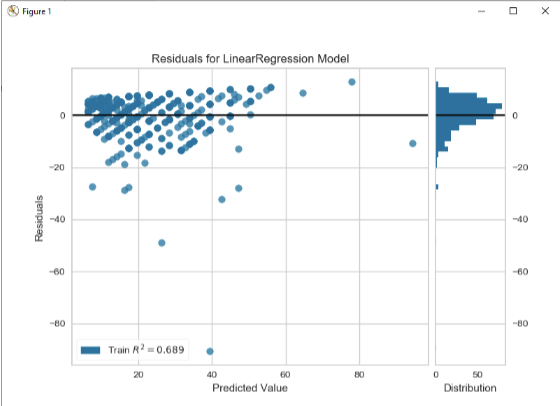

In [ ]:
x = df["Distance"].values
y = df["Time"].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)


In [ ]:
#Let's fit a linear regression model!
linear_model = LinearRegression()
linear_model.fit(x, y)

#Let's draw the regression line by predicting y for every value of X
x_range = np.linspace(min(x),max(x)) # generate all possible Xs
x_range = x_range.reshape(-1,1)
y_predictions = linear_model.predict(x_range)

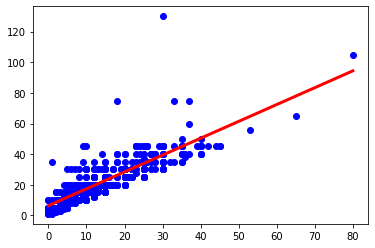

In [ ]:
# Type solution here
plt.scatter(x, y, color='blue')
plt.plot(x_range, y_predictions, color='red', linewidth=3)
plt.show() 


In [ ]:
y_pred = linear_model.predict(x)
# Compute and print R^2 and RMSE
print("R^2: {}".format(linear_model.score(x, y)))
rmse = np.sqrt(mean_squared_error(y,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6892999440429254
Root Mean Squared Error: 7.925290044037502


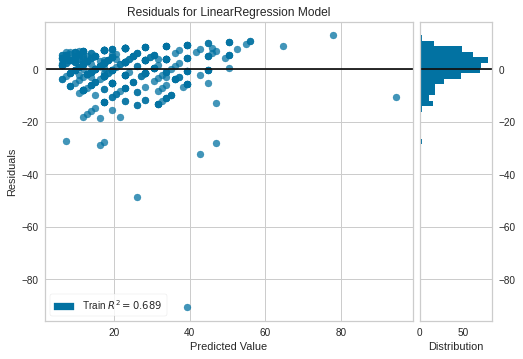

In [ ]:
visualizer = ResidualsPlot(linear_model)
visualizer.fit(x, y)
visualizer.poof();
